In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import time
import tensorflow as tf

## Load the data from the file

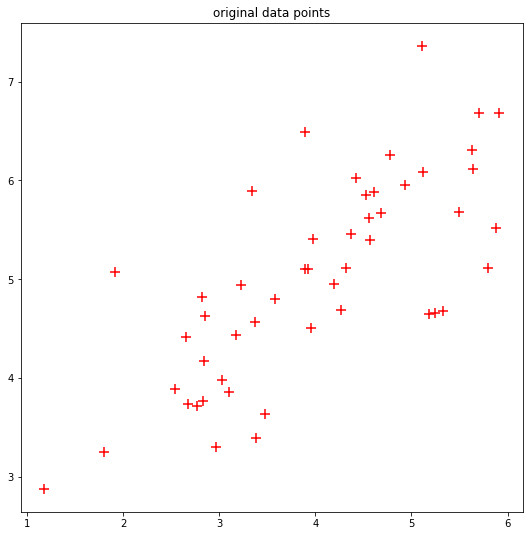

In [8]:
data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

plt.figure(1,figsize=(9,9))
plt.scatter(x, y, s=100, c='r', marker='+', label='data')
plt.title('original data points')
plt.show()

## Define funcitons

In [4]:
def normalize_data(x, y):

    xn = # normalize x. the mean of xn is zero and the standard deviation of xn is one #
    yn = # normalize y. the mean of yn is zero and the standard deviation of yn is one #

    return xn, yn


def compute_covariance(x, y):

    covar = # compute the covariance matrix #
    
    return covar


def compute_principal_direction(covariance):

    direction = # compute the principal directions from the co-variance matrix #
    
    return direction


def compute_projection(point, axis):

    projection = # compute the projection of point on the axis #
    
    return projection


def compute_distance(point1, point2):

    distance = # compute the Euclidean distance between point1 and point2 #
    
    return distance


SyntaxError: invalid syntax (<ipython-input-4-fa6d5312bfd0>, line 3)

## 1. Plot the original data points [1pt]

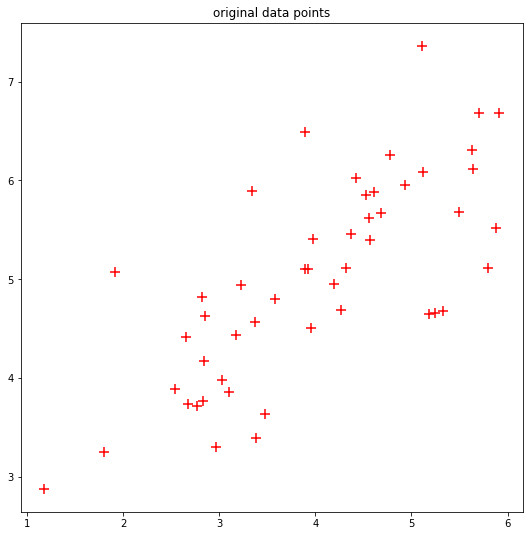

In [9]:
plt.figure(1,figsize=(9,9))
plt.scatter(x, y, s=100, c='r', marker='+', label='data')
plt.title('original data points')
plt.show()

## 2. Plot the normalized data points [1pt]

## 3. Plot the principal axes [2pt]

## 4. Plot the first principal axis [3pt]

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

## 7. Plot the second principal axis [3pt]

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]